In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

1. Чтение данных из файла

In [3]:
student_scores = pd.read_csv('data/student_scores.csv', sep=',')
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


2. Статистическая информация о используемых данных (количество, min, max, среднее) по каждому из столбцов

In [4]:
student_scores.describe().loc[['count', 'min', 'max', 'mean']]

,Hours,Scores
count,25.000,25.00
min,1.100,17.00
max,9.200,95.00
mean,5.012,51.48


4. Вычисление параметров регрессионной прямой методом наименьших квадратов

   Регрессия имеет вид
   
   $ f(x) = \omega_0 + \omega_1 x $

   Задача: найти такие $ \omega_0 $ и $ \omega_1 $, что функция MSE

   $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - f(x_i))^2 $ или $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - \omega_0 - \omega_1 x)^2 $
   
   (среднеквадратическая ошибка) будет принимать наименьшее значение.

   Находя минимумы по  $ \omega_0 $ и $ \omega_1 $ и решая полученную систему получим точное решение:
   $$ \omega_1 = \frac{\frac{\sum_{i=0}^{n} x_i \sum_{i=0}^{n} y_i}{n} - \sum_{i=0}^{n}(y_i * x_i)}{\frac{(\sum_{i=0}^{n} x_i)^2}{n} - \sum_{i=0}^{n} x_i^2} $$
   $$ \omega_0 = \frac{1}{n}(\sum_{i=0}^{n} y_i - \omega_1 * \sum_{i=0}^{n} x_i) $$

In [5]:
x = student_scores.Hours
y = student_scores.Scores
n = x.size

Параметры регрессионной прямой:

In [6]:
w1 = (x.sum() * y.sum() / n - np.dot(x, y))/(((x.sum())**2)/n - (x**2).sum())
w0 = 1/n * (y.sum() - w1 * x.sum())
print(f'y = {w0} + {w1}x')

y = 2.483673405373247 + 9.77580339078746x


In [10]:
def get_y_regr(x):
    return w0 + w1*x
y_regr = get_y_regr(x)

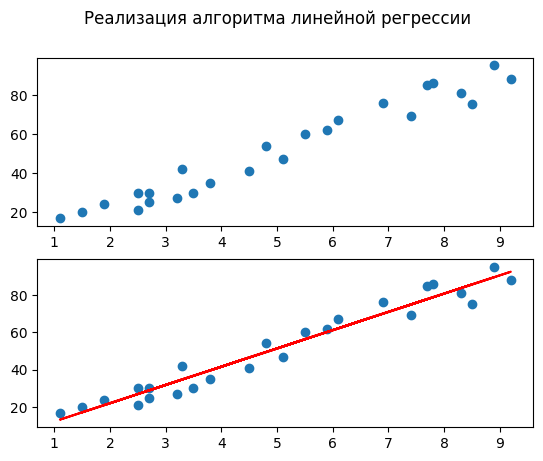

In [29]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Реализация алгоритма линейной регрессии')
ax1.scatter(student_scores.Hours, student_scores.Scores)

ax2.scatter(student_scores.Hours, student_scores.Scores)
ax2.plot(x, y_regr, 'r')

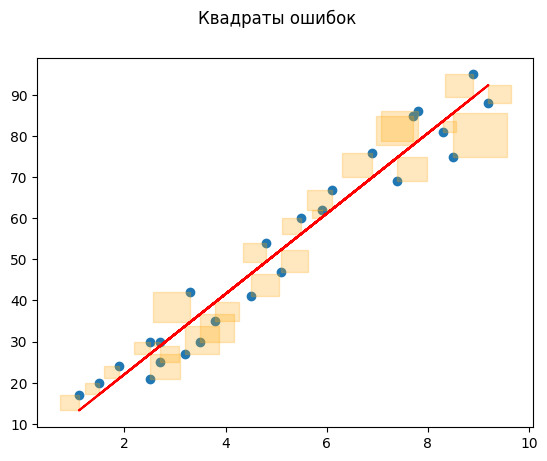

In [43]:
fig, (ax3) = plt.subplots(1)

fig.suptitle('Квадраты ошибок')

ax3.scatter(student_scores.Hours, student_scores.Scores)
ax3.plot(x, y_regr, 'r')

for i in range(n):
    square = patches.Rectangle((student_scores.Hours[i], student_scores.Scores[i]), (get_y_regr(student_scores.Hours[i]) - student_scores.Scores[i])/10, get_y_regr(student_scores.Hours[i]) - student_scores.Scores[i], edgecolor='orange', facecolor='orange', alpha=0.25)
    ax3.add_patch(square)